# Lesson 9: Plotting graph with MatPlotLib

In this lesson, we learn to plot graph from data by using MatPlotLib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Plotting line chart

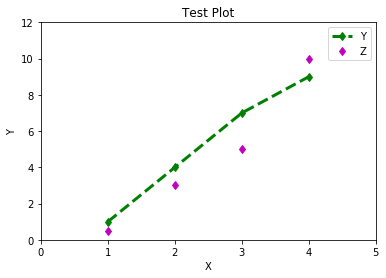

In [2]:
x = range(1,5)
y = [1,4,7,9]
z = [0.5,3,5,10]

plt.plot(x,y, '--dg', linewidth=3)
plt.plot(x,z, 'dm')
plt.title('Test Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Y', 'Z'])

plt.xlim(0,5)
plt.ylim(0, 12)
plt.show()

There are some available line styles:

- solid `-`
- dashed `--`
- dashdot `-.`
- dotted `:`

For the data point, we can have:

- diamond `d`
- circle `o`
- dot `.`
- square `s`


## Plotting chart from plain text file

[[ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]]


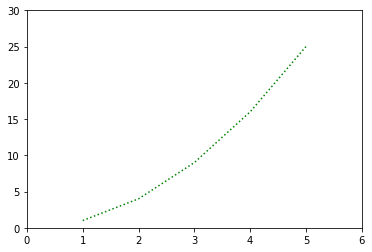

In [3]:
data = np.loadtxt('sample_data.txt', delimiter=',')
data = data.reshape(5,2)

print(data)

x = data[:, 0]
y = data[:, 1]

plt.plot(x, y, ':g')

plt.xlim(0,6)
plt.ylim(0,30)

plt.show()

## Plotting pie chart

65.1


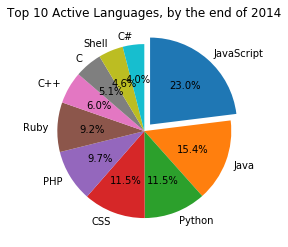

In [4]:
# Top Active Languages by https://githut.info
labels = ['JavaScript', 'Java', 'Python', 'CSS', 'PHP', 'Ruby', 'C++', 'C', 'Shell','C#']

values = [15,10,7.5,7.5,6.3,6,3.9,3.3, 3,2.6]

explodes= np.zeros(len(labels))
explodes[0] = 0.1

print(sum(values))

plt.title("Top 10 Active Languages, by the end of 2014")

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False, explode=explodes)

plt.show()

## Countries dataset

In [5]:
dataset = pd.read_csv('countries.csv')

We need to register the following converter explicitly, otherwise, we will get a warning.

In [6]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Plotting counties comparation

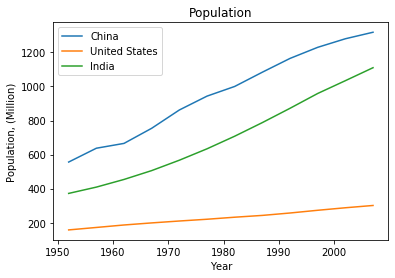

In [7]:
data = pd.read_csv('countries.csv', delimiter=',')

data['population'] = data['population'] / 1000000
data['year'] = pd.to_datetime(data['year'], format='%Y')

china_data = data[data['country']=='China']
us_data = data[data['country']=='United States']
india_data = data[data['country']=='India']

# print(china_data, us_data)

plt.plot(china_data['year'], china_data['population'])
plt.plot(us_data['year'], us_data['population'])
plt.plot(india_data['year'], india_data['population'])

plt.legend(['China','United States','India'])

plt.ylabel("Population, (Million)")
plt.xlabel("Year")
plt.title("Population")

plt.show()

### Top 10 countries plotting as at 2007 population

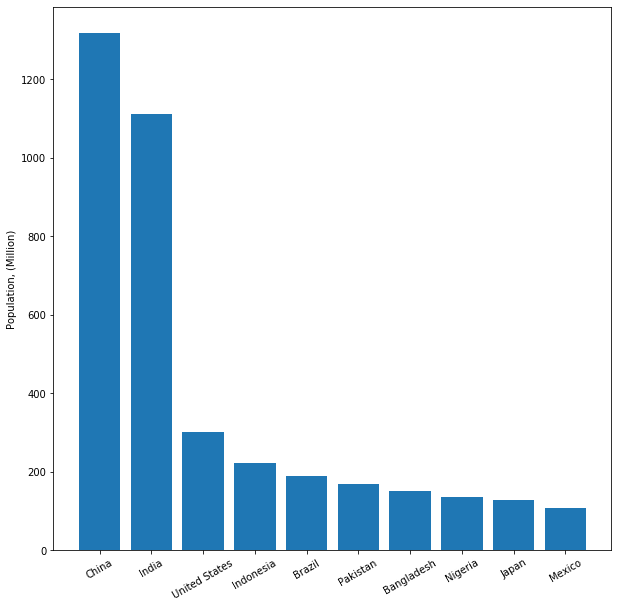

In [8]:
data = pd.read_csv('countries.csv', delimiter=',')

data['population'] = data['population'] / 1000000


year_2007 = data[data['year']==2007]

year_2007 = year_2007.sort_values(by='population', ascending=False)

plt.figure(figsize=(10,10))
plt.xticks(rotation=30)


plt.ylabel("Population, (Million)")
plt.bar(year_2007['country'][:10], year_2007['population'][:10])

plt.show()

### Global plotting year growth globally

year
1952-01-01    2398.406788
1957-01-01    2654.240365
1962-01-01    2887.864036
1967-01-01    3203.829692
1972-01-01    3561.751119
1977-01-01    3913.260611
1982-01-01    4270.935450
1987-01-01    4671.719619
1992-01-01    5090.023342
1997-01-01    5493.575867
2002-01-01    5864.523340
2007-01-01    6227.838885
Name: population, dtype: float64


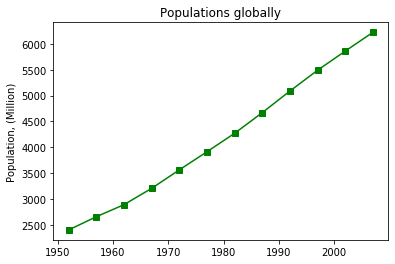

In [9]:
data = pd.read_csv('countries.csv', delimiter=',')
data['year'] = pd.to_datetime(data['year'], format='%Y')

data['population'] = data['population'] / 1000000

by_year = data.groupby('year')


populations = by_year['population'].agg(np.sum)

print(populations)

plt.title("Populations globally")
plt.ylabel("Population, (Million)")
plt.plot(populations, 'g-s')

plt.show()

## Iris Data Set

About [Iris Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set).

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


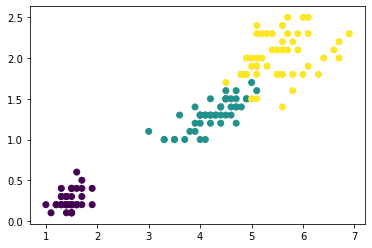

In [10]:
iris = pd.read_csv('iris.csv',delimiter=',')

print(iris.describe())

iris['species'] = iris['species'].map({'setosa':0,'versicolor':1,'virginica':2})

plt.scatter(iris.petal_length, iris.petal_width, c=iris.species)

plt.show()

## Plotting Iris data in 3D chart

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


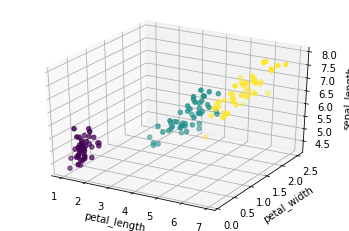

In [11]:
from mpl_toolkits.mplot3d import Axes3D

iris = pd.read_csv('iris.csv',delimiter=',')

print(iris.describe())

iris['species'] = iris['species'].map({'setosa':0,'versicolor':1,'virginica':2})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris.petal_length, iris.petal_width, iris.sepal_length, c=iris.species)

ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('sepal_length')

plt.show()

## Using Yahoo Finance

https://github.com/ranaroussi/yfinance


In [12]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


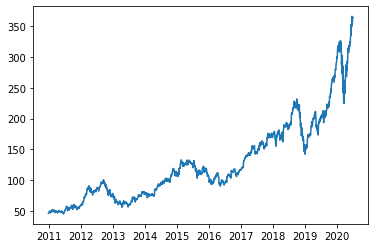

In [13]:
import matplotlib.pyplot as plt
import yfinance as yf

data = yf.download("AAPL", start="2011-01-01", end="2020-12-31")

plt.plot(data.Close)

plt.show()

[*********************100%***********************]  1 of 1 completed


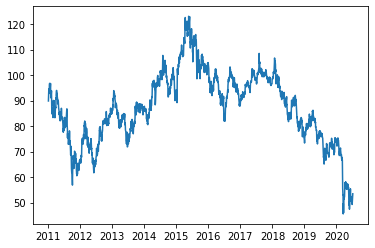

In [14]:
import matplotlib.pyplot as plt
import yfinance as yf

data = yf.download("0001.HK", start="2011-01-01", end="2020-12-31")

plt.plot(data.Close)

plt.show()

We can use `Ticker` to get details on a specific stock.

The following code examples are from yfinance documentation.

In [15]:
import yfinance as yf

stock = yf.Ticker("0001.HK")

In [16]:
stock

yfinance.Ticker object <0001.HK>

In [17]:
# get historical market data
stock.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-04,33.037,33.368,32.377,32.377,3194413,0.0,0
2000-01-05,30.890,31.386,29.982,30.147,6058531,0.0,0
2000-01-06,30.394,30.560,28.082,28.660,10440480,0.0,0
2000-01-07,29.073,29.403,28.577,29.238,6049796,0.0,0
2000-01-10,30.229,30.725,29.486,29.486,5195405,0.0,0
...,...,...,...,...,...,...,...
2020-06-29,49.750,50.000,48.800,49.250,8766822,0.0,0
2020-06-30,49.550,50.450,49.400,49.800,8831897,0.0,0
2020-07-02,49.050,51.400,49.050,51.250,10852670,0.0,0


In [18]:
# show dividends
stock.dividends

Date
2000-05-16    1.050
2000-10-10    0.380
2001-05-15    1.220
2001-10-09    0.380
2002-05-14    1.220
2002-10-08    0.380
2003-05-13    1.220
2003-10-07    0.380
2004-05-11    1.300
2004-10-05    0.380
2005-05-10    1.420
2005-10-04    0.420
2006-05-09    1.580
2006-10-03    0.460
2007-05-08    1.740
2007-10-02    0.500
2008-05-13    1.950
2008-09-29    0.500
2009-05-12    1.950
2009-09-24    0.500
2010-05-18    2.200
2010-09-10    0.500
2011-05-11    2.450
2011-09-14    0.530
2012-05-30    2.630
2012-09-11    0.530
2013-05-24    2.630
2013-09-03    0.580
2014-05-21    2.900
2014-09-01    0.638
2015-03-11    3.016
2015-03-16    3.016
2015-09-22    0.700
2016-05-18    1.850
2016-09-09    0.735
2017-05-16    1.945
2017-09-04    0.780
2018-05-15    2.070
2018-09-03    0.870
2019-05-21    2.300
2019-09-02    0.870
2020-05-19    2.300
Name: Dividends, dtype: float64

In [19]:
# show splits
stock.splits

Series([], Name: Stock Splits, dtype: int64)

If the stock is US Stock, we can access to more information

In [20]:
stock = yf.Ticker("AAPL")

In [21]:
# show next event (earnings, etc)
stock.calendar

,Value
Earnings Date,2020-07-30 00:00:00
Earnings Average,2
Earnings Low,1.55
Earnings High,2.47
Revenue Average,51530300000
Revenue Low,42799000000
Revenue High,55838000000


In [22]:
# show options expirations
stock.options

('2020-07-10',
 '2020-07-17',
 '2020-07-24',
 '2020-07-31',
 '2020-08-07',
 '2020-08-14',
 '2020-08-21',
 '2020-09-18',
 '2020-10-16',
 '2020-11-20',
 '2020-12-18',
 '2021-01-15',
 '2021-06-18',
 '2021-09-17',
 '2022-01-21',
 '2022-06-17',
 '2022-09-16')

In [23]:
# get option chain for specific expiration
opt = stock.option_chain('2020-07-31')
# data available via: opt.calls, opt.puts

In [24]:
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL200731C00170000,2020-06-25 13:30:59,170.0,192.00,192.10,196.80,0.00,0.000000,1.0,1.0,1.261722,True,REGULAR,USD
1,AAPL200731C00175000,2020-06-18 19:59:59,175.0,176.85,187.50,191.60,0.00,0.000000,NaN,1.0,1.261234,True,REGULAR,USD
2,AAPL200731C00185000,2020-06-16 16:42:04,185.0,166.91,177.20,181.75,0.00,0.000000,NaN,1.0,1.143559,True,REGULAR,USD
3,AAPL200731C00190000,2020-06-24 13:58:56,190.0,173.70,172.30,176.80,0.00,0.000000,NaN,1.0,1.131840,True,REGULAR,USD
4,AAPL200731C00205000,2020-06-23 13:30:03,205.0,159.23,157.20,162.00,0.00,0.000000,NaN,12.0,1.027837,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,AAPL200731C00455000,2020-07-02 16:47:33,455.0,0.48,0.18,0.60,-0.02,-4.000002,14.0,208.0,0.449224,False,REGULAR,USD
62,AAPL200731C00460000,2020-07-02 17:48:57,460.0,0.45,0.32,0.92,-0.02,-4.255321,5.0,78.0,0.504399,False,REGULAR,USD
63,AAPL200731C00465000,2020-07-02 19:31:52,465.0,0.35,0.01,0.50,-0.10,-22.222221,22.0,691.0,0.469976,False,REGULAR,USD
64,AAPL200731C00470000,2020-07-02 14:02:00,470.0,0.41,0.00,0.44,-0.04,-8.888887,5.0,88.0,0.477056,False,REGULAR,USD


In [25]:
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL200731P00170000,2020-07-01 15:15:04,170.0,0.01,0.00,2.14,0.000000,0.000000,630.0,630,1.498538,False,REGULAR,USD
1,AAPL200731P00175000,2020-07-01 13:36:43,175.0,0.04,0.00,0.35,0.000000,0.000000,1.0,19,1.121098,False,REGULAR,USD
2,AAPL200731P00180000,2020-07-01 19:27:33,180.0,0.06,0.01,2.15,0.000000,0.000000,8.0,13,1.399417,False,REGULAR,USD
3,AAPL200731P00185000,2020-06-29 15:14:22,185.0,0.11,0.00,2.15,0.000000,0.000000,3.0,5,1.349613,False,REGULAR,USD
4,AAPL200731P00190000,2020-07-01 15:45:57,190.0,0.05,0.00,0.05,0.000000,0.000000,10.0,13,0.820314,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,AAPL200731P00420000,2020-06-30 17:34:00,420.0,58.03,54.10,58.50,0.000000,0.000000,NaN,0,0.446111,True,REGULAR,USD
63,AAPL200731P00425000,2020-07-01 19:26:35,425.0,61.12,59.10,63.20,0.000000,0.000000,1.0,1,0.455816,True,REGULAR,USD
64,AAPL200731P00430000,2020-06-30 14:19:01,430.0,66.72,63.65,68.35,0.000000,0.000000,10.0,9,0.488164,True,REGULAR,USD
65,AAPL200731P00455000,2020-07-02 15:29:37,455.0,89.14,88.50,93.20,-0.410004,-0.457849,2.0,8,0.592778,True,REGULAR,USD


## MatPlotLib styles

Beside customizing each line colors ourself, we can use pre-defined styles. The available styles can be found by `plt.style.available`.

In [26]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

Then, we can use the style by `with` and `plt.style.context('style-name')`.

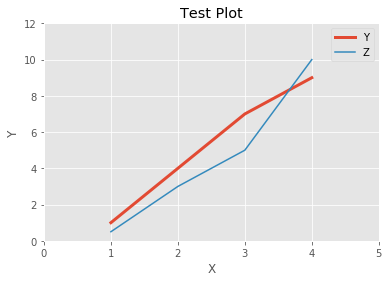

In [27]:
x = range(1,5)
y = [1,4,7,9]
z = [0.5,3,5,10]

with plt.style.context('ggplot'):
    plt.plot(x,y, linewidth=3)
    plt.plot(x,z)
    plt.title('Test Plot')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(['Y', 'Z'])

    plt.xlim(0,5)
    plt.ylim(0, 12)
    plt.show()

Listing all styles for a line chart:

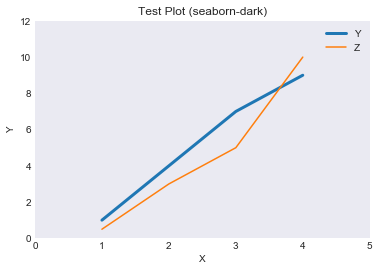

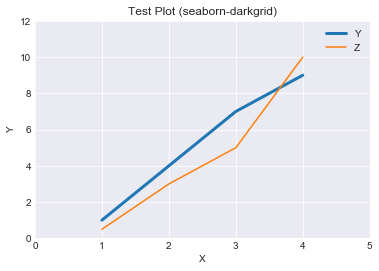

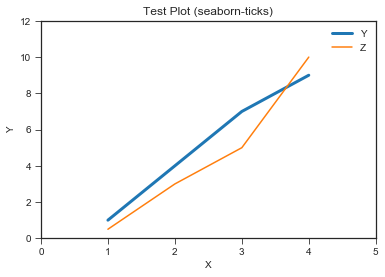

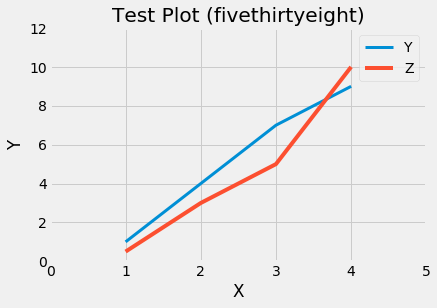

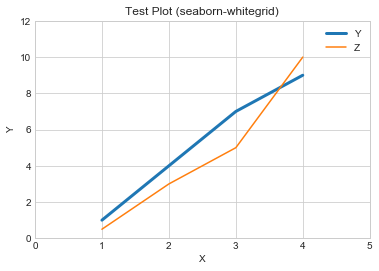

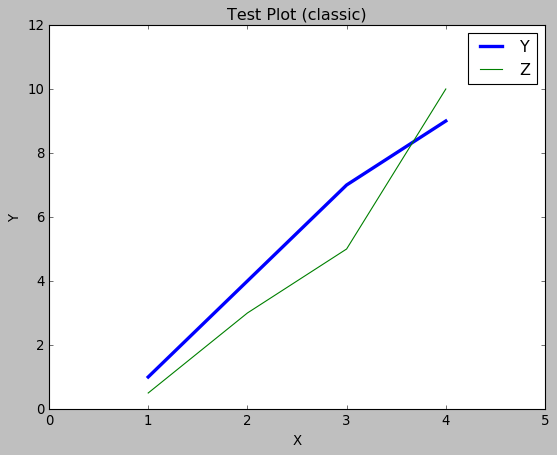

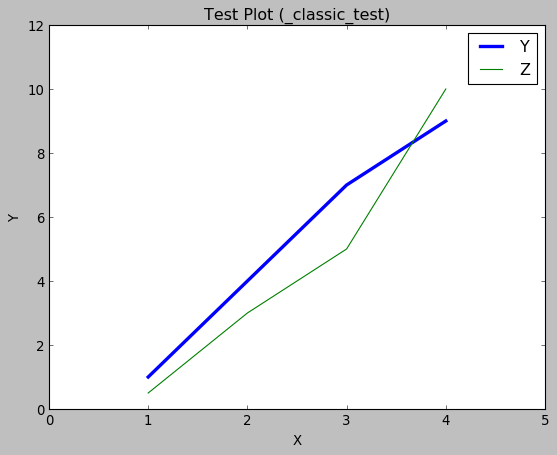

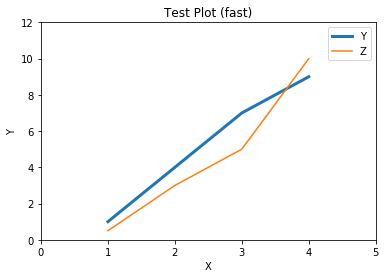

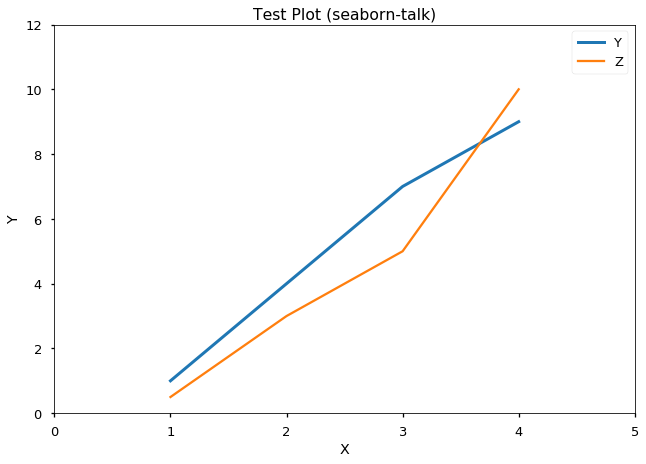

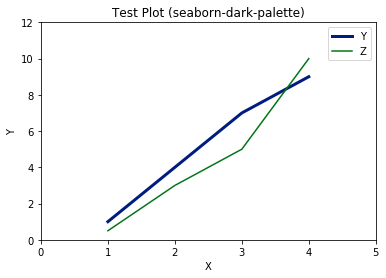

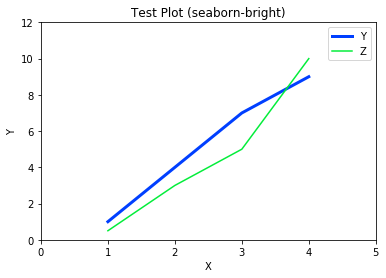

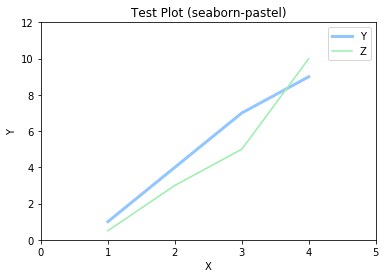

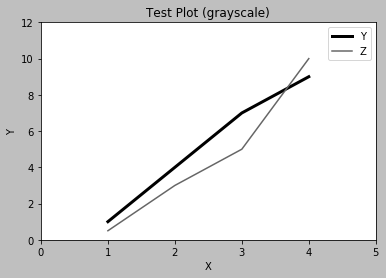

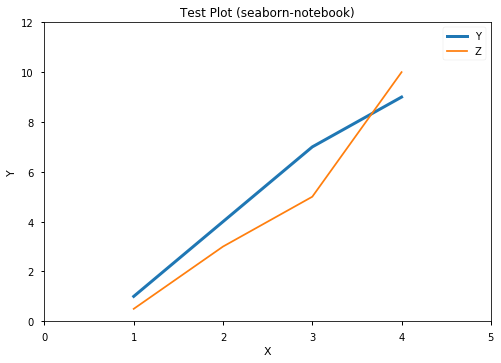

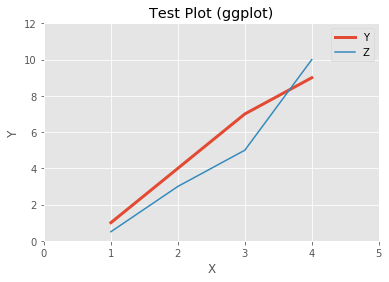

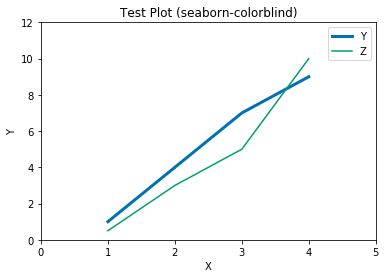

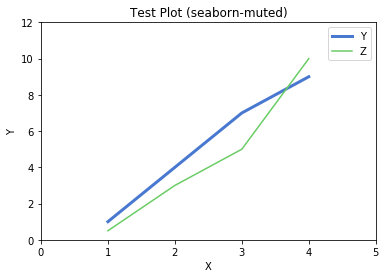

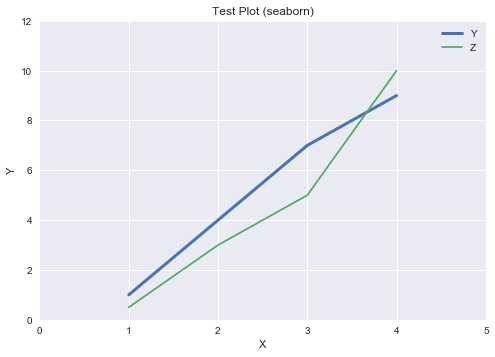

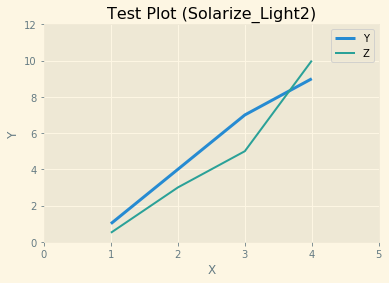

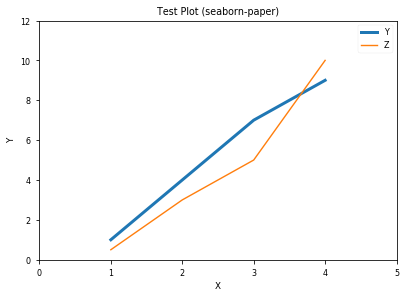

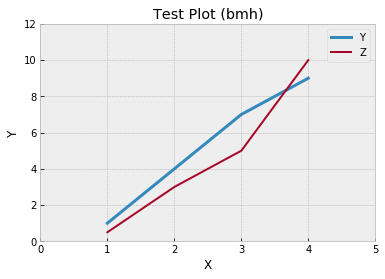

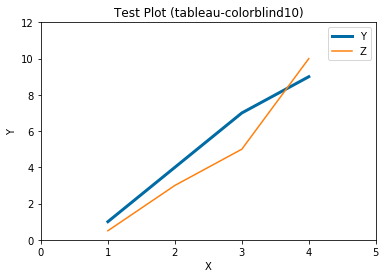

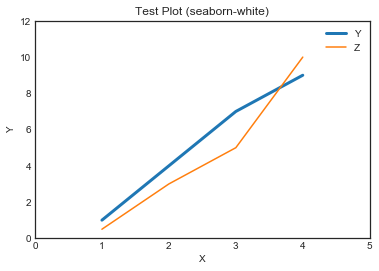

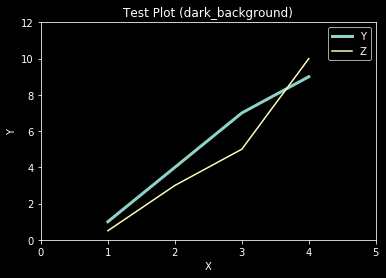

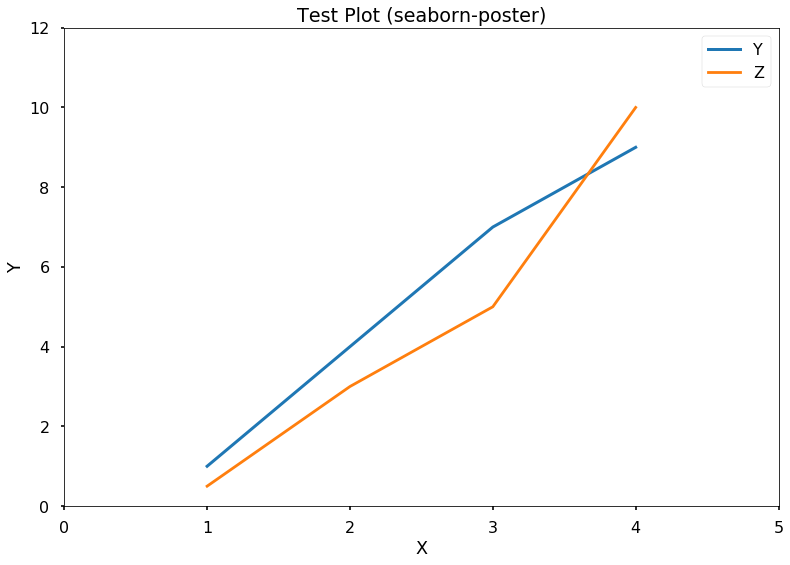

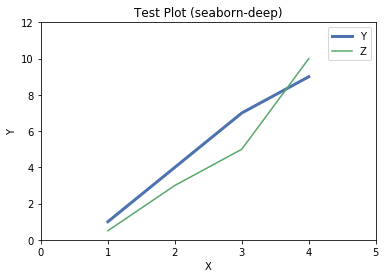

In [28]:
x = range(1,5)
y = [1,4,7,9]
z = [0.5,3,5,10]

for style in plt.style.available:
    with plt.style.context(style):
        plt.plot(x,y, linewidth=3)
        plt.plot(x,z)
        plt.title(f'Test Plot ({style})')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend(['Y', 'Z'])

        plt.xlim(0,5)
        plt.ylim(0, 12)
        plt.show()

Listing all styles for a bar chart:

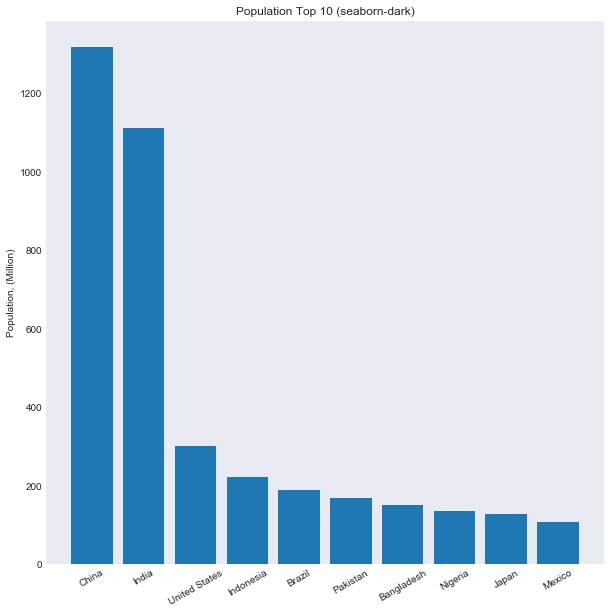

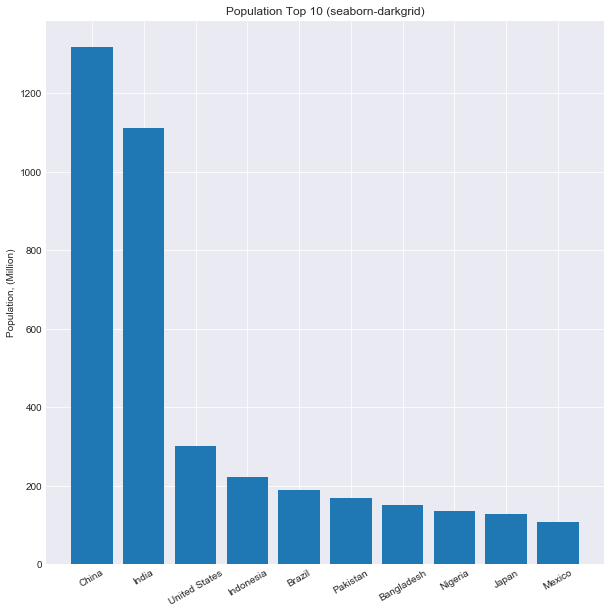

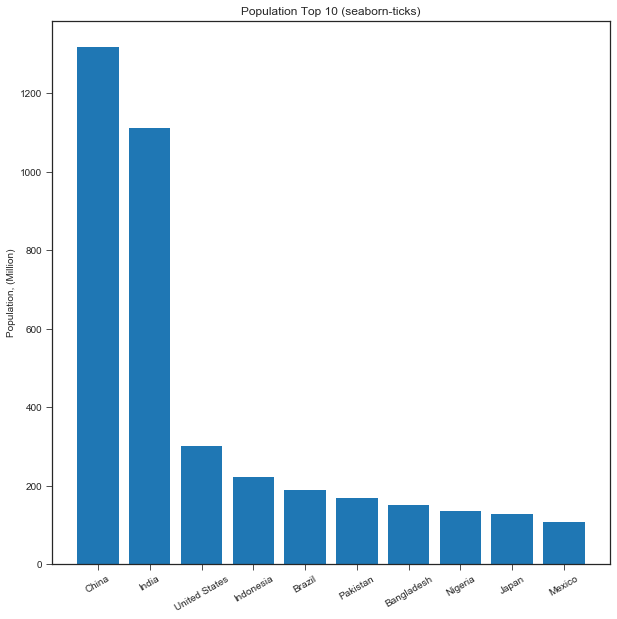

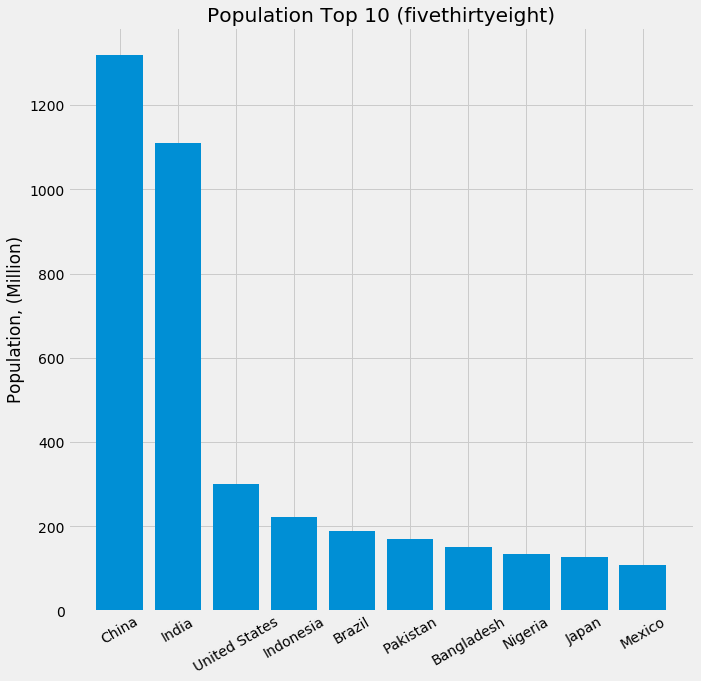

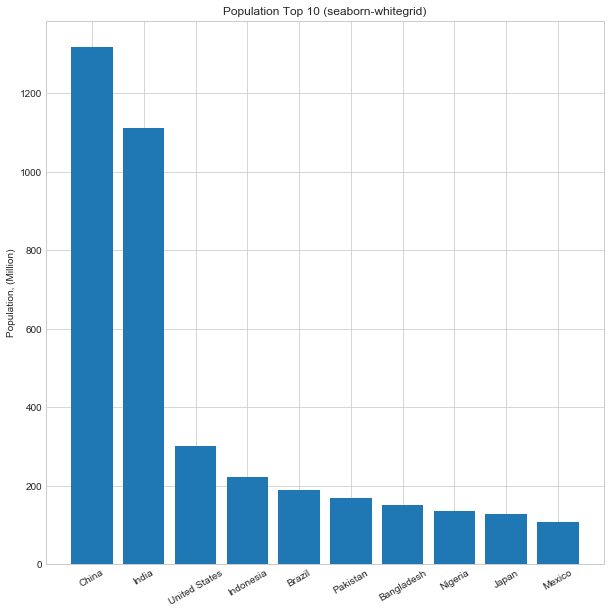

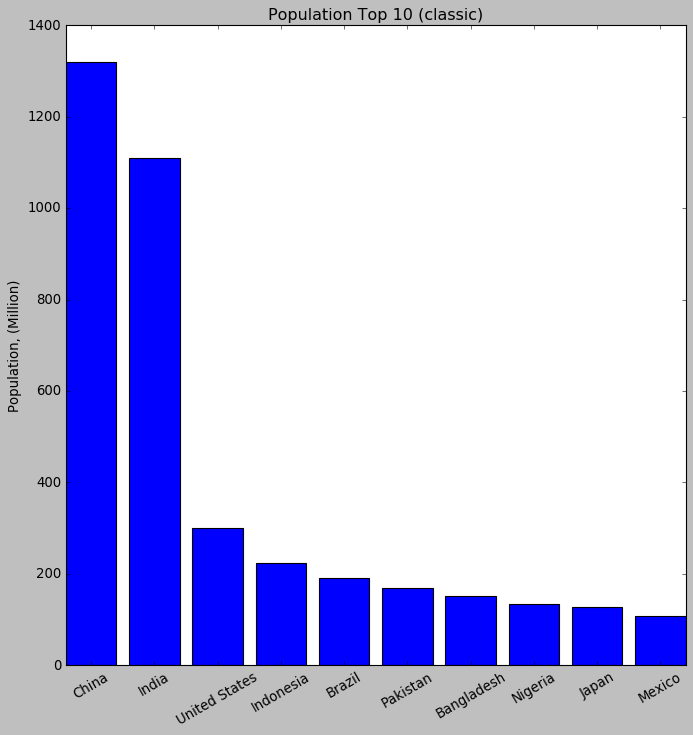

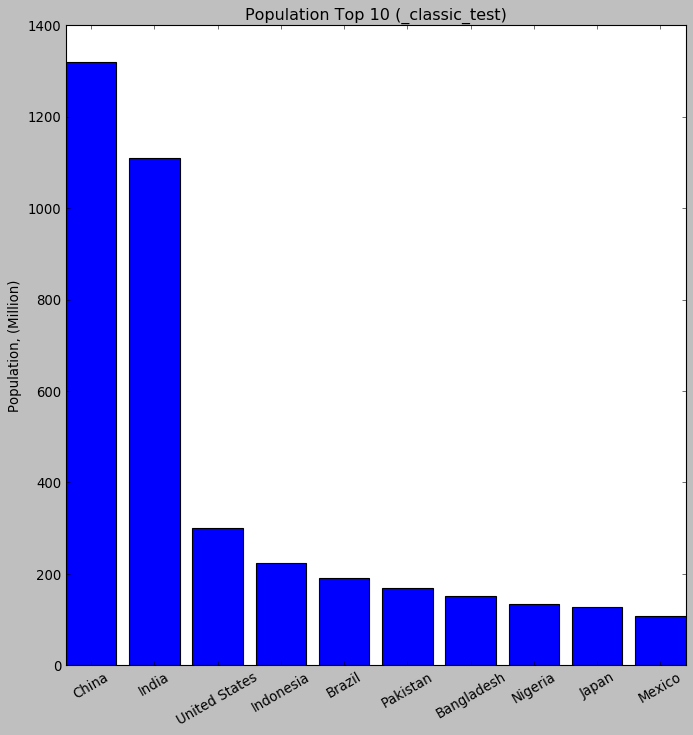

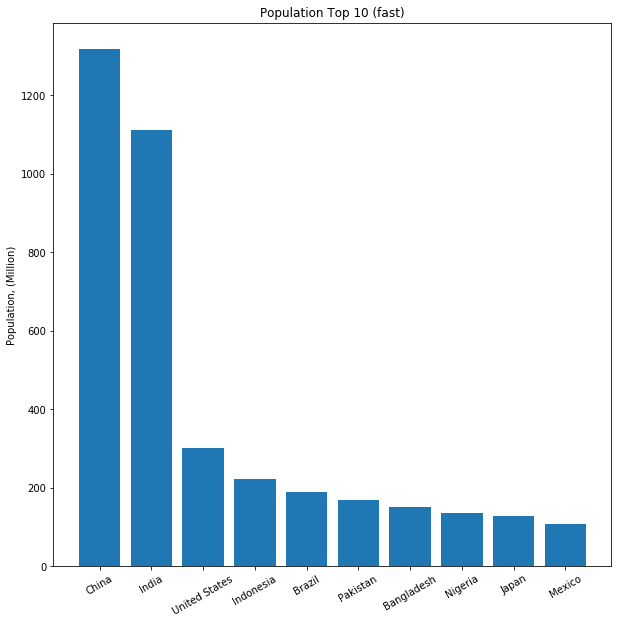

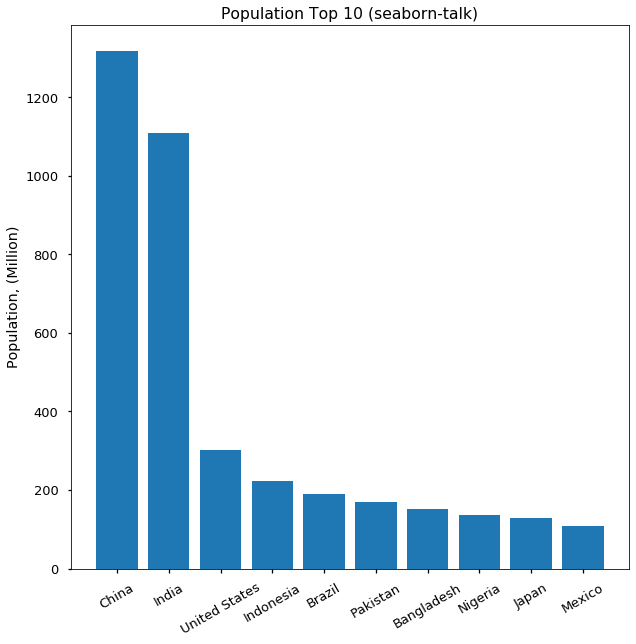

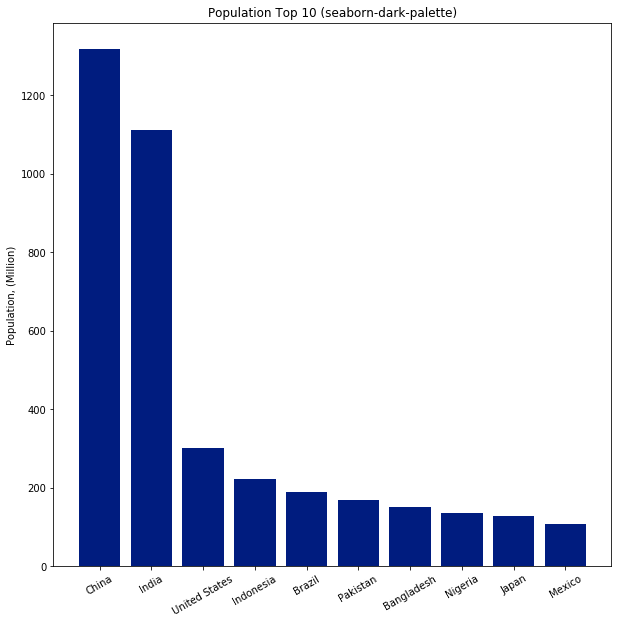

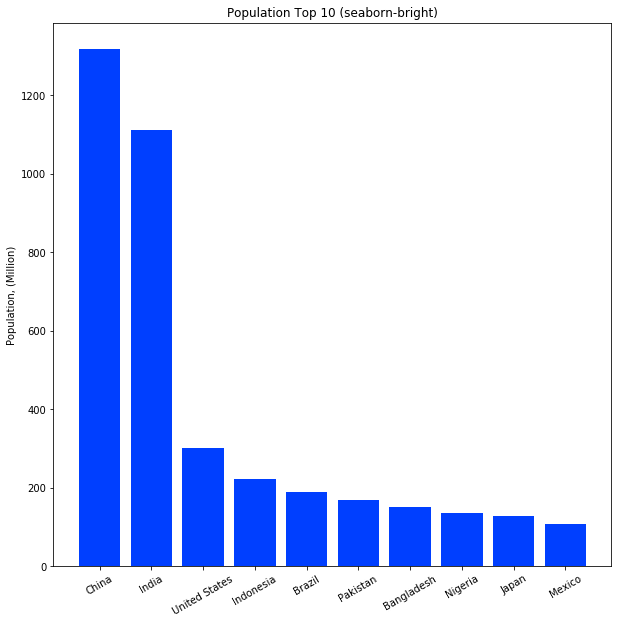

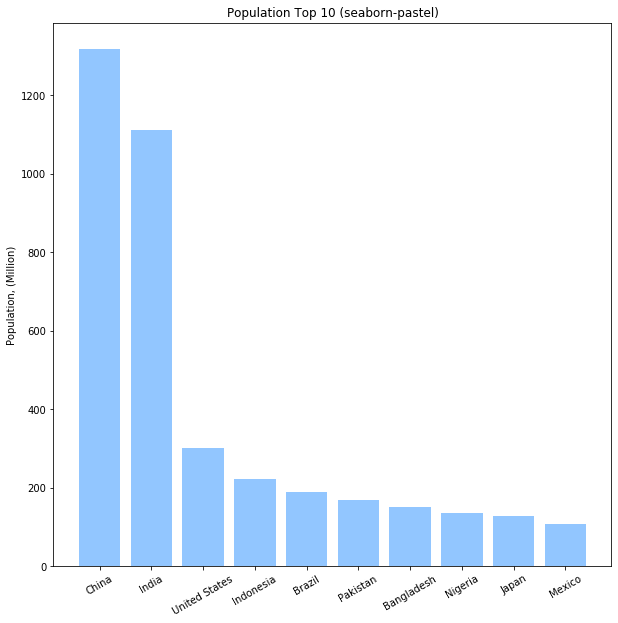

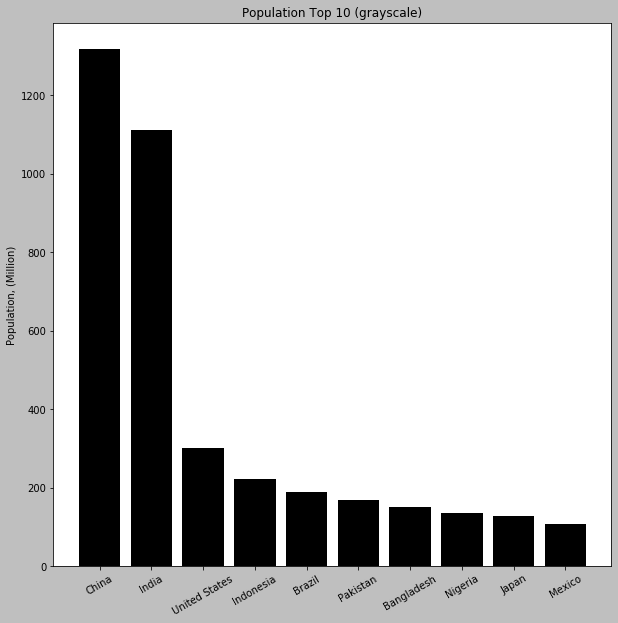

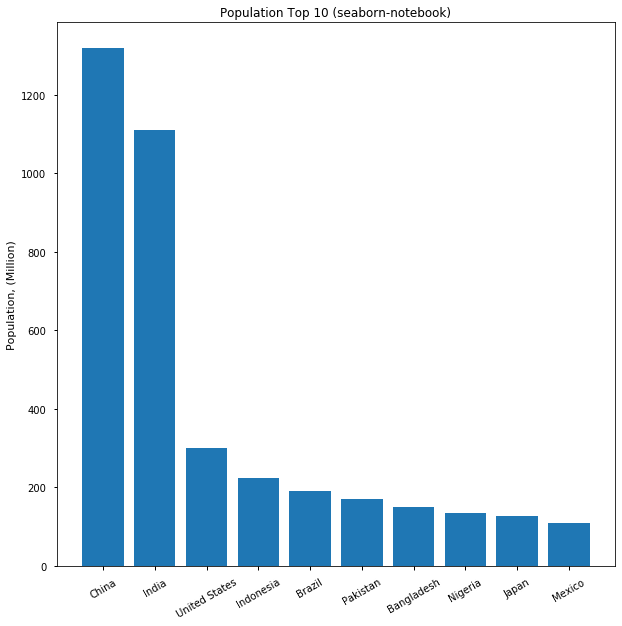

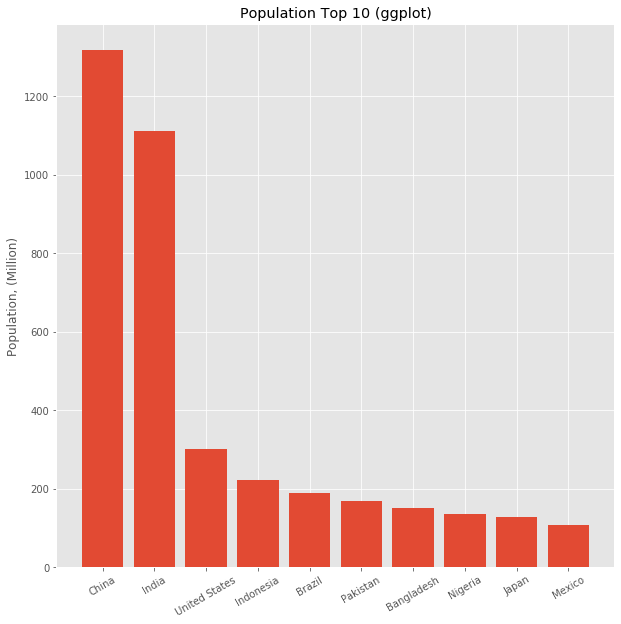

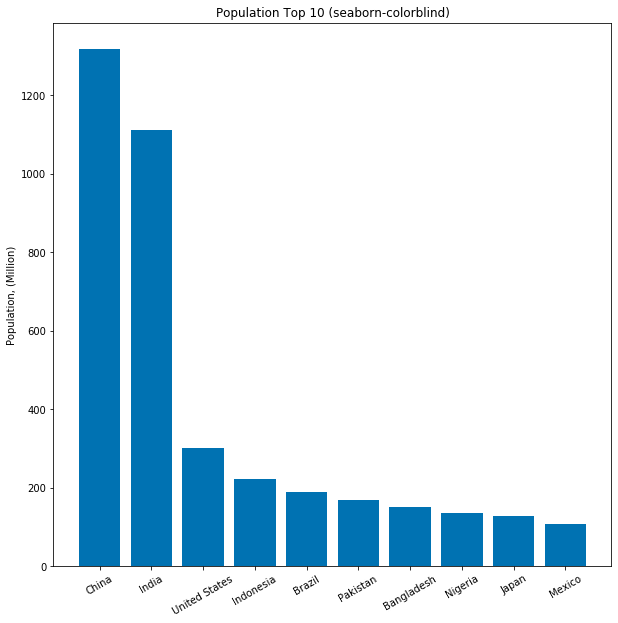

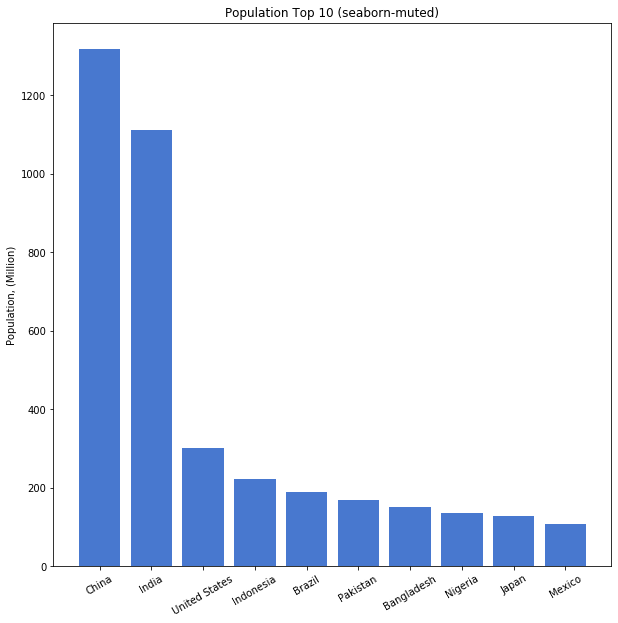

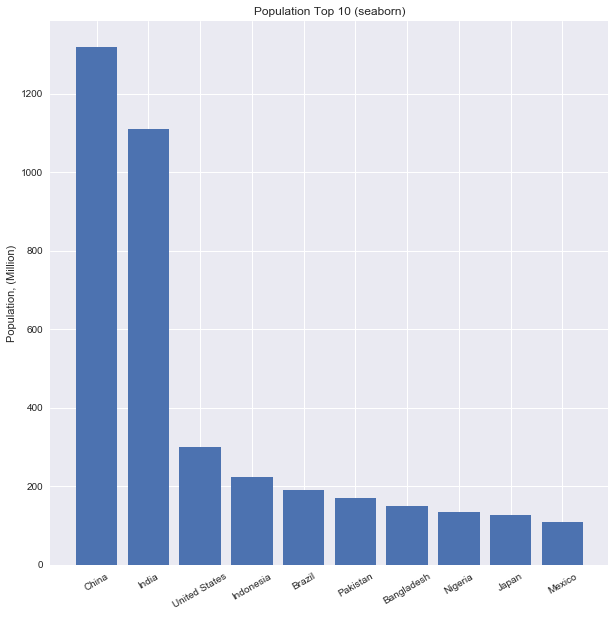

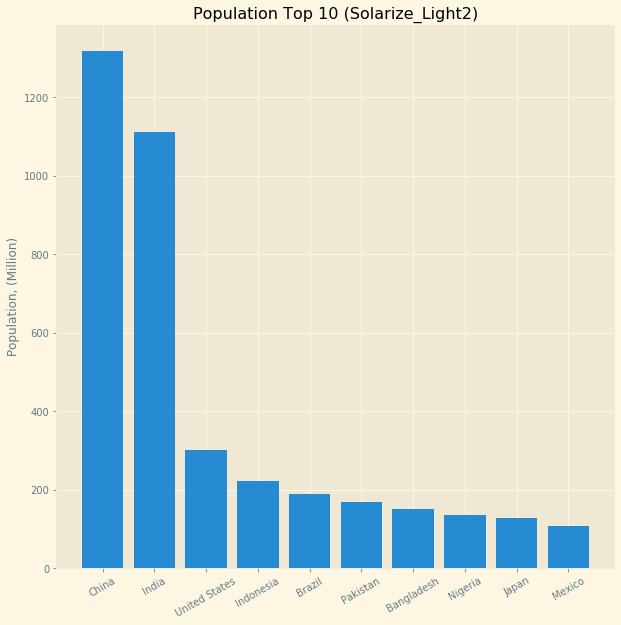

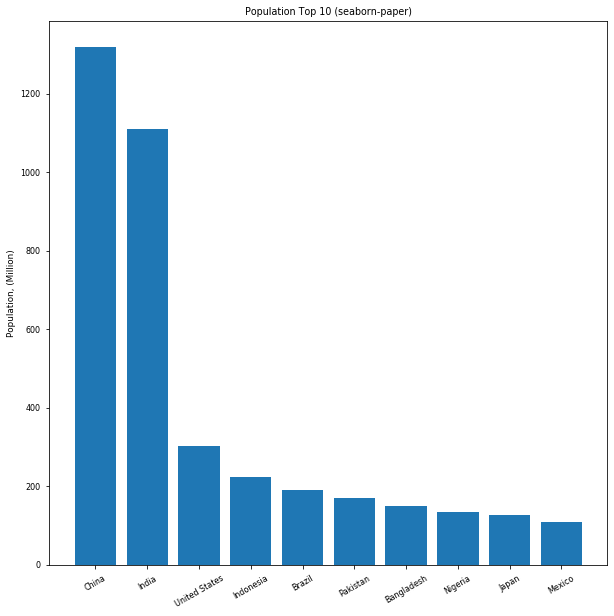

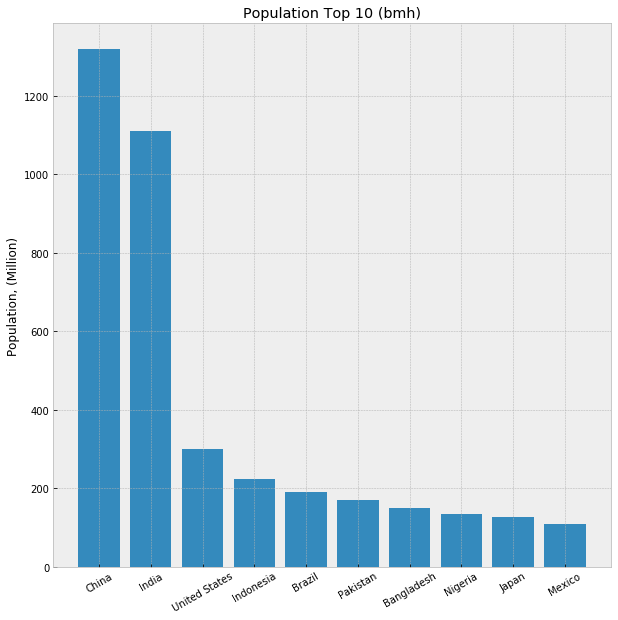

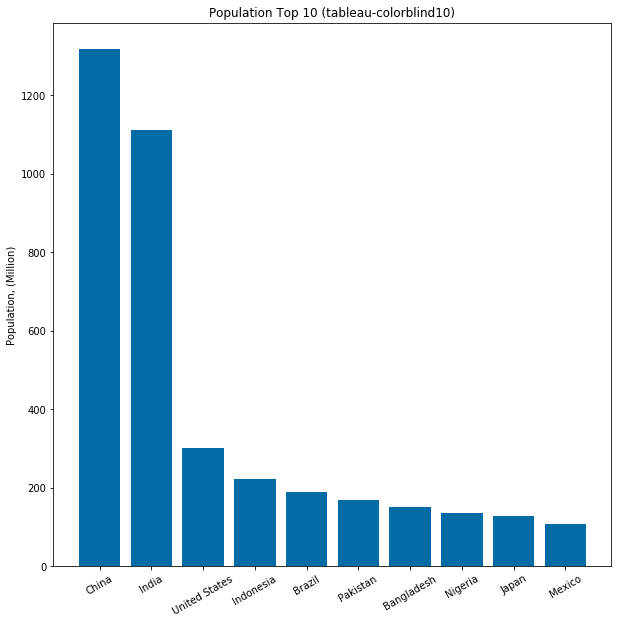

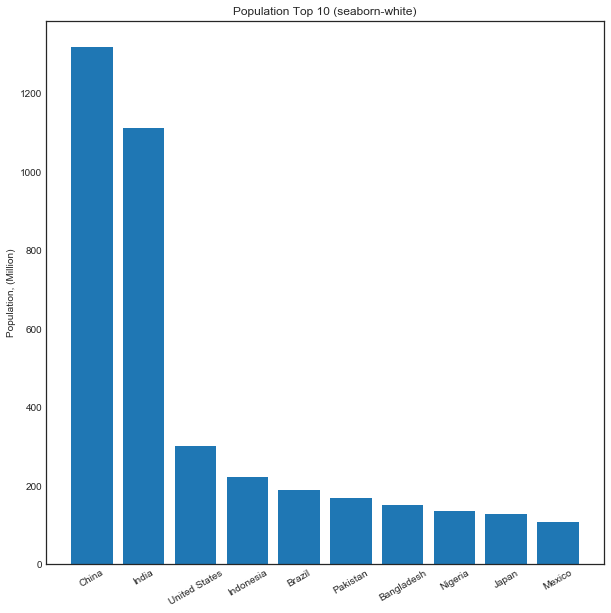

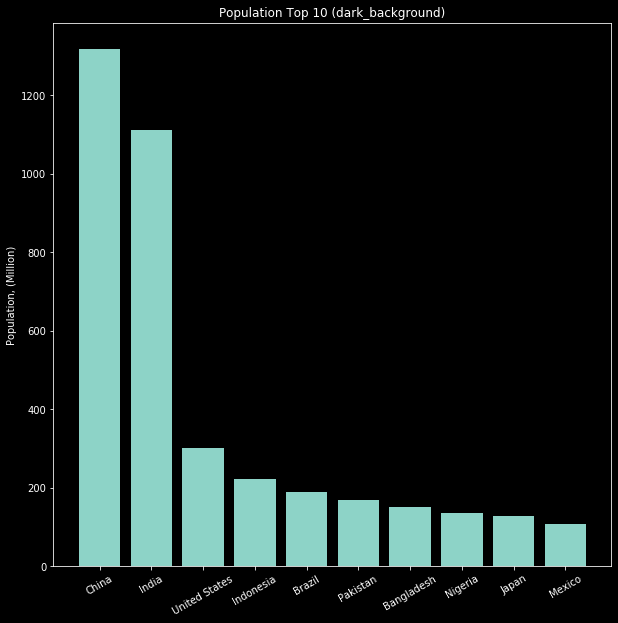

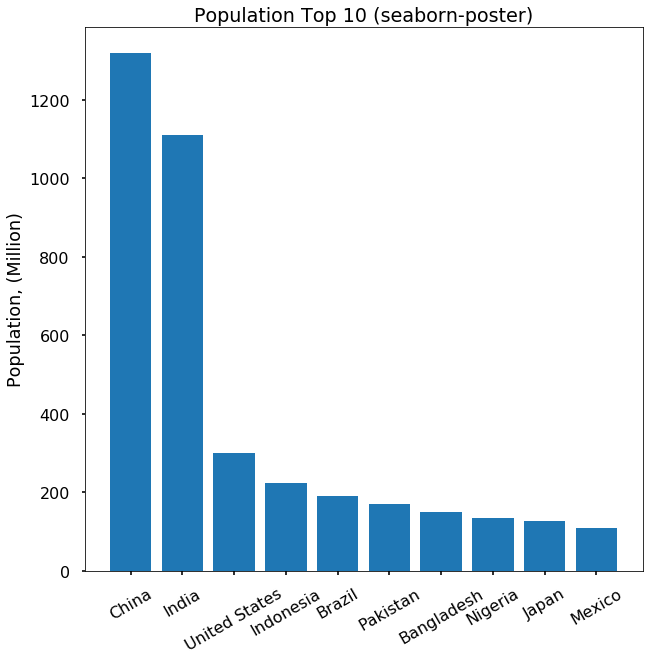

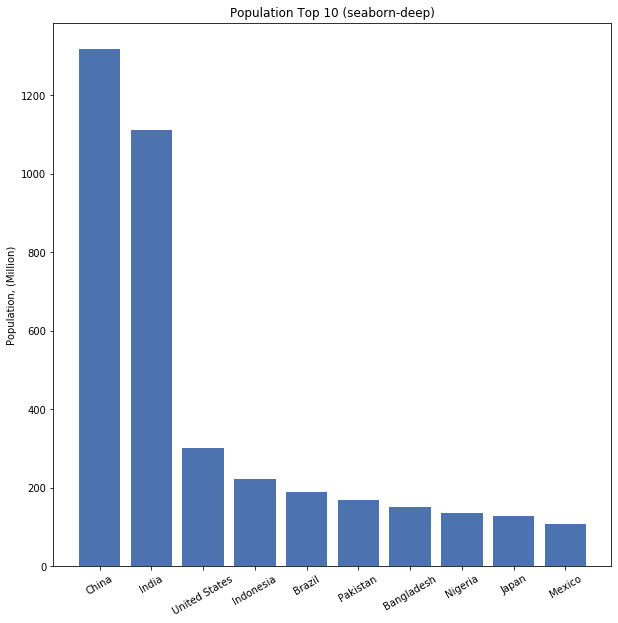

In [29]:
data = pd.read_csv('countries.csv', delimiter=',')

data['population'] = data['population'] / 1000000


year_2007 = data[data['year']==2007]

year_2007 = year_2007.sort_values(by='population', ascending=False)


for style in plt.style.available:
    with plt.style.context(style):
        plt.figure(figsize=(10,10))
        plt.xticks(rotation=30)


        plt.ylabel("Population, (Million)")
        plt.bar(year_2007['country'][:10], year_2007['population'][:10])
        plt.title(f"Population Top 10 ({style})")
        plt.show()

## Summary

In this lesson, we learned to plot the processed data by using MatPlotLib. We also explored more data set.